In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train['WhatIsData'] = 'Train'
test['WhatIsData'] = 'Test'

alldata = pd.concat(
    [
        train,
        test
    ],
    axis=0
).reset_index(drop=True)

/home/wataru/github/kaggle/taitanic/venv/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


In [4]:
train_x = train.drop(['Survived'], axis=1)
train_y = train['Survived']


In [5]:
test_x = test.copy()

In [6]:
train.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
def missing_table(df):
    null_val = df.isnull().sum()
    percent = 100 * df.isnull().sum()/len(df)
    miss_val_table = pd.concat([null_val, percent], axis=1)
    miss_val_table_ren_columns = miss_val_table.rename(
    columns = {0 : '欠損数', 1 : '%'})
    return miss_val_table_ren_columns 

# 欠損値の確認
missing_table(train)

,欠損数,%
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,177,19.865320
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


In [8]:
train['Survived'].mean()


0.3838383838383838

In [9]:
# Pclassの種別毎の生存率
train['Survived'].groupby(train['Pclass']).mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

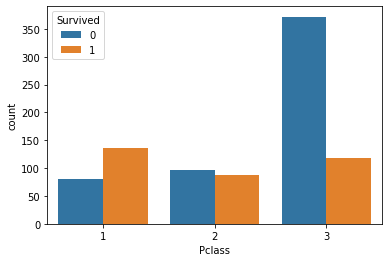

In [10]:
sns.countplot(train['Pclass'], hue=train['Survived'])

In [11]:
pd.crosstab(alldata['Pclass'], alldata['WhatIsData'], normalize='columns')



WhatIsData,Test,Train
Pclass,,
1,0.255981,0.242424
2,0.222488,0.206510
3,0.521531,0.551066


In [12]:
train['Name'].head()


0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [13]:
train['honorific'] = train['Name'].map(lambda x: x.split(', ')[1].split('. ')[0])
train['honorific'].value_counts()


Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Col               2
Major             2
Sir               1
Mme               1
Jonkheer          1
Ms                1
Don               1
Lady              1
Capt              1
the Countess      1
Name: honorific, dtype: int64

In [14]:
alldata['honorific'] = alldata['Name'].map(lambda x: x.split(', ')[1].split('. ')[0])
pd.crosstab(alldata['honorific'], alldata['WhatIsData'])

WhatIsData,Test,Train
honorific,,
Capt,0,1
Col,2,2
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,0,1
Major,0,2
Master,21,40


In [15]:
# 学習データにしか現れない継承を除外
only_train_honorific = ['Capt', 'Don', 'Jonkheer', 'Lady', 'Major', 'Mile', 'Mme', 'Sir', 'the Countess']
train_omit1 = train[~train['honorific'].isin(only_train_honorific)].reset_index(drop=True)

In [16]:
train_omit1


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,WhatIsData,honorific
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Train,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Train,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Train,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Train,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Train,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Train,Rev
878,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Train,Miss
879,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Train,Miss
880,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Train,Mr


In [17]:
# ベースライン生存率と継承に関連性がありそう
train_omit1['honorific'].replace(['Col', 'Dr', 'Rev'], 'Rare', inplace=True) #少数派の継承を統合
train_omit1['honorific'].replace('Mlle', 'Miss', inplace=True) #Missに統合
train_omit1['honorific'].replace('Ms', 'Miss', inplace=True) #Missに統合 

# 敬称別の生存率
train_omit1['Survived'].groupby(train_omit1['honorific']).agg(['mean', 'count'])


,mean,count
honorific,,
Master,0.575000,40
Miss,0.702703,185
Mr,0.156673,517
Mrs,0.792000,125
Rare,0.266667,15


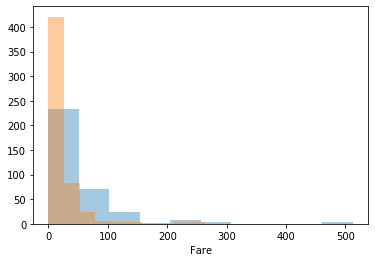

In [18]:
# Fareの分布
sns.distplot(train[train['Survived']==1]['Fare'],
             kde=False, rug=False, bins=10, label='Survived')
sns.distplot(train[train['Survived']==0]['Fare'],
             kde=False, rug=False, bins=10, label='Death')

In [19]:
# かなり右に裾野が広がっているので、Fareのskewness（歪度）を確認する。
print("Skewness of Fare:", train['Fare'].skew())


Skewness of Fare: 4.787316519674893


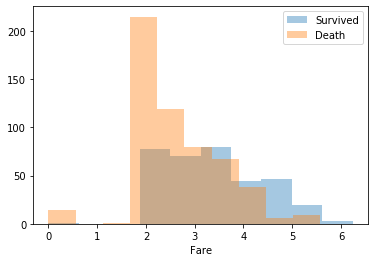

In [20]:
# 歪度が大きい値となっているので、対数変換を行う
sns.distplot(np.log1p(train[train['Survived']==1]['Fare']),
             kde=False, rug=False, bins=10, label='Survived')
sns.distplot(np.log1p(train[train['Survived']==0]['Fare']),
             kde=False, rug=False, bins=10, label='Death')
plt.legend()

In [21]:
# Ageの欠損有無による生存率差
train['Survived'].groupby(train['Age'].isnull()).mean()

Age
False    0.406162
True     0.293785
Name: Survived, dtype: float64

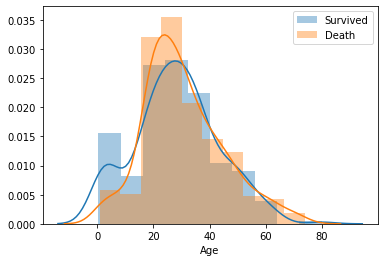

In [22]:
# Ageの欠損を除外
train_age_omit = train.dropna(subset=['Age'])
# Ageの分布
sns.distplot(train_age_omit[train_age_omit['Survived']==1]['Age'],
             kde=True, rug=False, bins=10, label='Survived')
sns.distplot(train_age_omit[train_age_omit['Survived']==0]['Age'],
             kde=True, rug=False, bins=10, label='Death')
plt.legend()

FamilySize_bin
alone     0.303538
big       0.000000
mediam    0.204082
small     0.578767
Name: Survived, dtype: float64

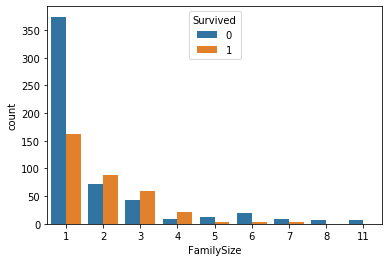

In [23]:
# 家族数 = Parch + SibSp + 1
train['FamilySize'] = train['Parch'] + train['SibSp'] + 1
alldata['FamilySize'] = alldata['Parch'] + alldata['SibSp'] + 1

# 家族数ごとの分布を確認
sns.countplot(train['FamilySize'], hue=train['Survived'])

# FamilySizeを離散化
train['FamilySize_bin'] = 'big'
train.loc[train['FamilySize']==1, 'FamilySize_bin'] = 'alone'
train.loc[(train['FamilySize']>=2) & (train['FamilySize']<=4),
          'FamilySize_bin'] = 'small'
train.loc[(train['FamilySize']>=5) & (train['FamilySize']<=7),
          'FamilySize_bin'] = 'mediam'

# FamilySizeを離散化した時の生存率
train['Survived'].groupby(train['FamilySize_bin']).mean()

In [24]:
# Cabinの頭文字
train['Cabin_ini'] = train['Cabin'].map(lambda x:str(x)[0])
alldata['Cabin_ini'] = alldata['Cabin'].map(lambda x:str(x)[0])

# Cabinの頭文字別の生存率とレコード数
train['Survived'].groupby(train['Cabin_ini']).agg(['mean', 'count'])

,mean,count
Cabin_ini,,
A,0.466667,15
B,0.744681,47
C,0.593220,59
D,0.757576,33
E,0.750000,32
F,0.615385,13
G,0.500000,4
T,0.000000,1
n,0.299854,687


In [25]:
# Cabinの頭文字別のカウント数
pd.crosstab(alldata['Cabin_ini'], alldata['WhatIsData'])

WhatIsData,Test,Train
Cabin_ini,,
A,7,15
B,18,47
C,35,59
D,13,33
E,9,32
F,8,13
G,1,4
T,0,1
n,327,687


In [27]:
train['Ticket'].head(100)

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
            ...       
95              374910
96            PC 17754
97            PC 17759
98              231919
99              244367
Name: Ticket, Length: 100, dtype: object

In [30]:
train['Survived'].groupby(
    train['Ticket'].map(lambda x: str(x)[0])).agg(['mean', 'count'])

,mean,count
Ticket,,
1,0.630137,146
2,0.464481,183
3,0.239203,301
4,0.200000,10
5,0.000000,3
6,0.166667,6
7,0.111111,9
8,0.000000,2
9,1.000000,1


In [31]:
pd.crosstab(alldata['Ticket'].map(lambda x: str(x)[0]), alldata['WhatIsData'])

WhatIsData,Test,Train
Ticket,,
1,64,146
2,95,183
3,128,301
4,1,10
5,0,3
6,3,6
7,4,9
8,0,2
9,1,1
